# 

In [34]:
import tensorflow as tf
tfe.enable_eager_execution()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
tf.Session(config=config)

ValueError: tf.enable_eager_execution must be called at program startup.

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import mpld3
mpld3.enable_notebook()

In [5]:
data_dir = r'D:\python_code\data\stock\^NYA'
fname = os.path.join(data_dir, 'NYA 1981 2018 technical.csv')
df = pd.read_csv(fname)
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

Close   <Open>   <High>   <Low>   <Volume>   <ParCl>   <FastAvg>  \
Date                                                                            
1981-01-02  827.50   827.50   827.50  827.50          0       0.0         0.0   
1981-01-05  836.17   836.17   836.17  836.17          0       0.0         0.0   
1981-01-06  836.81   836.81   836.81  836.81          0       0.0         0.0   
1981-01-07  817.24   817.24   817.24  817.24          0       0.0         0.0   
1981-01-08  805.72   805.72   805.72  805.72          0       0.0         0.0   

             <SlowAvg>   <RSI>   <OverBot>  ...     INDPRO       RPI  PERMIT  \
Date                                        ...                                
1981-01-02         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-05         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-06         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-07         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-08         0.0     0.0           0  ...    52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 46 columns]

In [6]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [7]:
df_idx.head(5)

Close   <Open>   <High>   <Low>   <Volume>   <ParCl>   <FastAvg>  \
Date                                                                            
1981-01-02  827.50   827.50   827.50  827.50          0       0.0         0.0   
1981-01-05  836.17   836.17   836.17  836.17          0       0.0         0.0   
1981-01-06  836.81   836.81   836.81  836.81          0       0.0         0.0   
1981-01-07  817.24   817.24   817.24  817.24          0       0.0         0.0   
1981-01-08  805.72   805.72   805.72  805.72          0       0.0         0.0   

             <SlowAvg>   <RSI>   <OverBot>  ...     INDPRO       RPI  PERMIT  \
Date                                        ...                                
1981-01-02         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-05         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-06         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-07         0.0     0.0           0  ...    52.4688  5723.536    1221   
1981-01-08         0.0     0.0           0  ...    52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 46 columns]

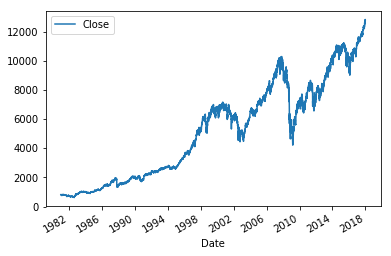

In [8]:
data = df_idx
data.plot(y='Close')

In [9]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1981 to %d"%(1981 + int(0.8*years)))
print(diff)

total data days: 13510.0
Total data: 37 years
80 percent data = 1981 to 2010
1167264000000000000 nanoseconds


In [10]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2011')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)


In [11]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [12]:
#without sc
#train_sc = train
#test_sc = test

In [13]:
train_sc.shape

(7570, 46)

In [14]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [15]:
train_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
Date                                                                      
1981-01-02  0.021235  0.021235  0.021070  0.021381   0.000000  0.000000   
1981-01-05  0.022129  0.022129  0.021958  0.022282   0.000000  0.000000   
1981-01-06  0.022195  0.022195  0.022024  0.022348   0.000000  0.000000   
1981-01-07  0.020176  0.020176  0.020020  0.020315   0.000000  0.000000   
1981-01-08  0.018987  0.018987  0.018840  0.019118   0.000000  0.000000   
1981-01-09  0.019249  0.019249  0.019100  0.019382   0.000000  0.000000   
1981-01-12  0.019336  0.019336  0.019186  0.019469   0.000000  0.077894   
1981-01-13  0.019150  0.019150  0.019002  0.019282   0.000000  0.077894   
1981-01-14  0.019369  0.019369  0.019219  0.019502   0.000000  0.077721   
1981-01-15  0.019849  0.019849  0.019695  0.019985   0.000000  0.077721   
1981-01-16  0.020220  0.020220  0.020064  0.020360   0.000000  0.077747   
1981-01-19  0.019968  0.019968  0.019814  0.020106   0.000000  0.077806   
1981-01-20  0.018343  0.018343  0.018201  0.018469   0.000000  0.078719   
1981-01-21  0.018102  0.018103  0.017962  0.018227   0.000000  0.078685   
1981-01-22  0.017415  0.017415  0.017280  0.017535   0.000000  0.078607   
1981-01-23  0.017372  0.017372  0.017237  0.017492   0.000000  0.078456   
1981-01-26  0.017077  0.017077  0.016944  0.017194   0.000000  0.078265   
1981-01-27  0.017885  0.017885  0.017746  0.018008   0.000000  0.078017   
1981-01-28  0.017437  0.017437  0.017302  0.017557   0.000000  0.077794   
1981-01-29  0.017339  0.017339  0.017205  0.017458   0.000000  0.077593   
1981-01-30  0.016881  0.016881  0.016750  0.016997   0.000000  0.077413   
1981-02-02  0.015134  0.015134  0.015017  0.015239   0.000000  0.077195   
1981-02-03  0.016019  0.016019  0.015895  0.016129   0.000000  0.076745   
1981-02-04  0.016193  0.016193  0.016068  0.016305   0.000000  0.076357   
1981-02-05  0.016924  0.016924  0.016793  0.017041   0.000000  0.076024   
1981-02-06  0.017491  0.017492  0.017356  0.017612   0.000000  0.073975   
1981-02-09  0.016640  0.016640  0.016511  0.016755   0.000000  0.074019   
1981-02-10  0.016564  0.016564  0.016436  0.016678   0.000000  0.074062   
1981-02-11  0.016007  0.016008  0.015884  0.016118   0.000000  0.074104   
1981-02-12  0.015549  0.015549  0.015429  0.015656   0.000000  0.074145   
...              ...       ...       ...       ...        ...       ...   
2010-11-18  0.722218  0.708696  0.718258  0.713579   0.409145  0.751141   
2010-11-19  0.724400  0.722221  0.718850  0.720675   0.320820  0.750439   
2010-11-22  0.721223  0.724402  0.718793  0.717531   0.322052  0.749752   
2010-11-23  0.706824  0.721227  0.715642  0.709336   0.360771  0.749079   
2010-11-24  0.718020  0.706830  0.712482  0.711700   0.295407  0.748418   
2010-11-26  0.709896  0.718024  0.712464  0.713557   0.140868  0.747772   
2010-11-29  0.708121  0.709900  0.704403  0.703271   0.320651  0.747137   
2010-11-30  0.702713  0.708122  0.702639  0.702845   0.374006  0.745708   
2010-12-01  0.720545  0.702719  0.715562  0.707560   0.396999  0.743628   
2010-12-02  0.731745  0.720550  0.726345  0.725514   0.433895  0.711029   
2010-12-03  0.735803  0.731753  0.730542  0.734697   0.326092  0.711663   
2010-12-06  0.734680  0.735808  0.730421  0.737063   0.307900  0.713063   
2010-12-07  0.734571  0.734692  0.737713  0.739344   0.608458  0.714407   
2010-12-08  0.735673  0.734576  0.732390  0.735815   0.402191  0.716748   
2010-12-09  0.738957  0.735679  0.734444  0.740117   0.394764  0.718948   
2010-12-10  0.743205  0.738962  0.737652  0.742864   0.396929  0.721015   
2010-12-13  0.745963  0.743212  0.743988  0.748332   0.380687  0.722959   
2010-12-14  0.746499  0.745968  0.744327  0.749392   0.360708  0.725868   
2010-12-15  0.740675  0.746504  0.741767  0.744724   0.384711  0.729244   
2010-12-16  0.744953  0.740624  0.739401  0.743900   0.413471  0.732282   
2010-12-17  0.744444  0.744958  0.739245

In [16]:
test_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
Date                                                                      
2011-01-03  0.765978  0.757734  0.762863  0.762954   0.374178  0.759722   
2011-01-04  0.763730  0.765986  0.761960  0.763485   0.418674  0.763190   
2011-01-05  0.765573  0.763734  0.760090  0.763599   0.415924  0.765963   
2011-01-06  0.761533  0.765576  0.760625  0.765030   0.422835  0.767211   
2011-01-07  0.759410  0.761538  0.757786  0.758497   0.433224  0.777058   
2011-01-10  0.757941  0.759413  0.753533  0.757270   0.352337  0.776768   
2011-01-11  0.763368  0.757948  0.758773  0.763170   0.353585  0.776156   
2011-01-12  0.774132  0.763380  0.768532  0.768640   0.368964  0.761453   
2011-01-13  0.773766  0.774137  0.770802  0.777234   0.376288  0.761872   
2011-01-14  0.779410  0.773769  0.773379  0.776632   0.406904  0.762778   
2011-01-18  0.781143  0.779416  0.775486  0.783895   0.461320  0.764227   
2011-01-19  0.772268  0.781146  0.776054  0.775931   0.414073  0.766203   
2011-01-20  0.769358  0.772267  0.766287  0.768274   0.430798  0.768529   
2011-01-21  0.772354  0.769363  0.771086  0.774663   0.430798  0.770622   
2011-01-24  0.777686  0.772356  0.772245  0.776860   0.340642  0.771647   
2011-01-25  0.776005  0.777689  0.771667  0.775139   0.401125  0.773428   
2011-01-26  0.781424  0.776018  0.776472  0.781365   0.412961  0.775031   
2011-01-27  0.782809  0.781429  0.778334  0.785025   0.376144  0.776809   
2011-01-28  0.767905  0.782814  0.777079  0.772429   0.490443  0.791603   
2011-01-31  0.775802  0.767911  0.770803  0.773201   0.363746  0.791603   
2011-02-01  0.791378  0.775811  0.785856  0.781156   0.450803  0.775497   
2011-02-02  0.789570  0.791380  0.786347  0.793940   0.357732  0.775960   
2011-02-03  0.791271  0.789574  0.785829  0.788143   0.381538  0.776887   
2011-02-04  0.791214  0.791277  0.785149  0.791312   0.342691  0.777778   
2011-02-07  0.796182  0.791223  0.792077  0.796674   0.340624  0.778632   
2011-02-08  0.800641  0.796188  0.794529  0.800151   0.338814  0.780186   
2011-02-09  0.796941  0.800646  0.794446  0.798721   0.342367  0.782317   
2011-02-10  0.796233  0.796940  0.790890  0.794649   0.365269  0.784278   
2011-02-11  0.800129  0.796237  0.795120  0.797131   0.368297  0.786081   
2011-02-14  0.803252  0.800134  0.797521  0.804999   0.311362  0.788212   
...              ...       ...       ...       ...        ...       ...   
2017-11-16  1.205541  1.200956  1.198120  1.209230   0.289162  1.191126   
2017-11-17  1.205501  1.203278  1.197382  1.211156   0.288067  1.189636   
2017-11-20  1.207346  1.205898  1.199061  1.212990   0.262175  1.188265   
2017-11-21  1.214067  1.210636  1.205843  1.218976   0.290909  1.172494   
2017-11-22  1.214576  1.216164  1.207833  1.221857   0.241174  1.172914   
2017-11-24  1.217786  1.217976  1.209363  1.225921   0.117821  1.173813   
2017-11-27  1.214572  1.217730  1.208915  1.222897   0.262465  1.175194   
2017-11-28  1.227931  1.216784  1.218779  1.224904   0.304500  1.176493   
2017-11-29  1.232171  1.228900  1.224530  1.237367   0.355988  1.178828   
2017-11-30  1.239032  1.235794  1.234145  1.243122   0.431075  1.182054   
2017-12-01  1.237666  1.239961  1.231645  1.230538   0.344120  1.186623   
2017-12-04  1.239764  1.245023  1.239347  1.248104   0.351176  1.190644   
2017-12-05  1.232774  1.239857  1.230733  1.240478   0.308918  1.195457   
2017-12-06  1.229190  1.231028  1.223076  1.236835   0.281855  1.199596   
2017-12-07  1.232962  1.227674  1.224697  1.235546   0.287389  1.203155   
2017-12-08  1.240607  1.236687  1.231014  1.243400   0.271132  1.204566   
2017-12-11  1.243203  1.241651  1.233694  1.250002   0.269892  1.204566   
2017-12-12  1.246254  1.244499  1.238588  1.252469   0.310371  1.207430   
2017-12-13  1.246430  1.247426  1.240914  1.255024   0.309209  1.209893   
2017-12-14  1.239163  1.247191  1.238254  1.247708   0.299403  1.212549   
2017-12-15  1.246450  1.241339  1.239254

In [17]:
for s in range(-5,-4):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [18]:
train_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
Date                                                                      
1981-01-02  0.021235  0.021235  0.021070  0.021381   0.000000  0.000000   
1981-01-05  0.022129  0.022129  0.021958  0.022282   0.000000  0.000000   
1981-01-06  0.022195  0.022195  0.022024  0.022348   0.000000  0.000000   
1981-01-07  0.020176  0.020176  0.020020  0.020315   0.000000  0.000000   
1981-01-08  0.018987  0.018987  0.018840  0.019118   0.000000  0.000000   
1981-01-09  0.019249  0.019249  0.019100  0.019382   0.000000  0.000000   
1981-01-12  0.019336  0.019336  0.019186  0.019469   0.000000  0.077894   
1981-01-13  0.019150  0.019150  0.019002  0.019282   0.000000  0.077894   
1981-01-14  0.019369  0.019369  0.019219  0.019502   0.000000  0.077721   
1981-01-15  0.019849  0.019849  0.019695  0.019985   0.000000  0.077721   
1981-01-16  0.020220  0.020220  0.020064  0.020360   0.000000  0.077747   
1981-01-19  0.019968  0.019968  0.019814  0.020106   0.000000  0.077806   
1981-01-20  0.018343  0.018343  0.018201  0.018469   0.000000  0.078719   
1981-01-21  0.018102  0.018103  0.017962  0.018227   0.000000  0.078685   
1981-01-22  0.017415  0.017415  0.017280  0.017535   0.000000  0.078607   
1981-01-23  0.017372  0.017372  0.017237  0.017492   0.000000  0.078456   
1981-01-26  0.017077  0.017077  0.016944  0.017194   0.000000  0.078265   
1981-01-27  0.017885  0.017885  0.017746  0.018008   0.000000  0.078017   
1981-01-28  0.017437  0.017437  0.017302  0.017557   0.000000  0.077794   
1981-01-29  0.017339  0.017339  0.017205  0.017458   0.000000  0.077593   
1981-01-30  0.016881  0.016881  0.016750  0.016997   0.000000  0.077413   
1981-02-02  0.015134  0.015134  0.015017  0.015239   0.000000  0.077195   
1981-02-03  0.016019  0.016019  0.015895  0.016129   0.000000  0.076745   
1981-02-04  0.016193  0.016193  0.016068  0.016305   0.000000  0.076357   
1981-02-05  0.016924  0.016924  0.016793  0.017041   0.000000  0.076024   
1981-02-06  0.017491  0.017492  0.017356  0.017612   0.000000  0.073975   
1981-02-09  0.016640  0.016640  0.016511  0.016755   0.000000  0.074019   
1981-02-10  0.016564  0.016564  0.016436  0.016678   0.000000  0.074062   
1981-02-11  0.016007  0.016008  0.015884  0.016118   0.000000  0.074104   
1981-02-12  0.015549  0.015549  0.015429  0.015656   0.000000  0.074145   
...              ...       ...       ...       ...        ...       ...   
2010-11-18  0.722218  0.708696  0.718258  0.713579   0.409145  0.751141   
2010-11-19  0.724400  0.722221  0.718850  0.720675   0.320820  0.750439   
2010-11-22  0.721223  0.724402  0.718793  0.717531   0.322052  0.749752   
2010-11-23  0.706824  0.721227  0.715642  0.709336   0.360771  0.749079   
2010-11-24  0.718020  0.706830  0.712482  0.711700   0.295407  0.748418   
2010-11-26  0.709896  0.718024  0.712464  0.713557   0.140868  0.747772   
2010-11-29  0.708121  0.709900  0.704403  0.703271   0.320651  0.747137   
2010-11-30  0.702713  0.708122  0.702639  0.702845   0.374006  0.745708   
2010-12-01  0.720545  0.702719  0.715562  0.707560   0.396999  0.743628   
2010-12-02  0.731745  0.720550  0.726345  0.725514   0.433895  0.711029   
2010-12-03  0.735803  0.731753  0.730542  0.734697   0.326092  0.711663   
2010-12-06  0.734680  0.735808  0.730421  0.737063   0.307900  0.713063   
2010-12-07  0.734571  0.734692  0.737713  0.739344   0.608458  0.714407   
2010-12-08  0.735673  0.734576  0.732390  0.735815   0.402191  0.716748   
2010-12-09  0.738957  0.735679  0.734444  0.740117   0.394764  0.718948   
2010-12-10  0.743205  0.738962  0.737652  0.742864   0.396929  0.721015   
2010-12-13  0.745963  0.743212  0.743988  0.748332   0.380687  0.722959   
2010-12-14  0.746499  0.745968  0.744327  0.749392   0.360708  0.725868   
2010-12-15  0.740675  0.746504  0.741767  0.744724   0.384711  0.729244   
2010-12-16  0.744953  0.740624  0.739401  0.743900   0.413471  0.732282   
2010-12-17  0.744444  0.744958  0.739245

In [19]:
test_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
Date                                                                      
2011-01-03  0.765978  0.757734  0.762863  0.762954   0.374178  0.759722   
2011-01-04  0.763730  0.765986  0.761960  0.763485   0.418674  0.763190   
2011-01-05  0.765573  0.763734  0.760090  0.763599   0.415924  0.765963   
2011-01-06  0.761533  0.765576  0.760625  0.765030   0.422835  0.767211   
2011-01-07  0.759410  0.761538  0.757786  0.758497   0.433224  0.777058   
2011-01-10  0.757941  0.759413  0.753533  0.757270   0.352337  0.776768   
2011-01-11  0.763368  0.757948  0.758773  0.763170   0.353585  0.776156   
2011-01-12  0.774132  0.763380  0.768532  0.768640   0.368964  0.761453   
2011-01-13  0.773766  0.774137  0.770802  0.777234   0.376288  0.761872   
2011-01-14  0.779410  0.773769  0.773379  0.776632   0.406904  0.762778   
2011-01-18  0.781143  0.779416  0.775486  0.783895   0.461320  0.764227   
2011-01-19  0.772268  0.781146  0.776054  0.775931   0.414073  0.766203   
2011-01-20  0.769358  0.772267  0.766287  0.768274   0.430798  0.768529   
2011-01-21  0.772354  0.769363  0.771086  0.774663   0.430798  0.770622   
2011-01-24  0.777686  0.772356  0.772245  0.776860   0.340642  0.771647   
2011-01-25  0.776005  0.777689  0.771667  0.775139   0.401125  0.773428   
2011-01-26  0.781424  0.776018  0.776472  0.781365   0.412961  0.775031   
2011-01-27  0.782809  0.781429  0.778334  0.785025   0.376144  0.776809   
2011-01-28  0.767905  0.782814  0.777079  0.772429   0.490443  0.791603   
2011-01-31  0.775802  0.767911  0.770803  0.773201   0.363746  0.791603   
2011-02-01  0.791378  0.775811  0.785856  0.781156   0.450803  0.775497   
2011-02-02  0.789570  0.791380  0.786347  0.793940   0.357732  0.775960   
2011-02-03  0.791271  0.789574  0.785829  0.788143   0.381538  0.776887   
2011-02-04  0.791214  0.791277  0.785149  0.791312   0.342691  0.777778   
2011-02-07  0.796182  0.791223  0.792077  0.796674   0.340624  0.778632   
2011-02-08  0.800641  0.796188  0.794529  0.800151   0.338814  0.780186   
2011-02-09  0.796941  0.800646  0.794446  0.798721   0.342367  0.782317   
2011-02-10  0.796233  0.796940  0.790890  0.794649   0.365269  0.784278   
2011-02-11  0.800129  0.796237  0.795120  0.797131   0.368297  0.786081   
2011-02-14  0.803252  0.800134  0.797521  0.804999   0.311362  0.788212   
...              ...       ...       ...       ...        ...       ...   
2017-11-16  1.205541  1.200956  1.198120  1.209230   0.289162  1.191126   
2017-11-17  1.205501  1.203278  1.197382  1.211156   0.288067  1.189636   
2017-11-20  1.207346  1.205898  1.199061  1.212990   0.262175  1.188265   
2017-11-21  1.214067  1.210636  1.205843  1.218976   0.290909  1.172494   
2017-11-22  1.214576  1.216164  1.207833  1.221857   0.241174  1.172914   
2017-11-24  1.217786  1.217976  1.209363  1.225921   0.117821  1.173813   
2017-11-27  1.214572  1.217730  1.208915  1.222897   0.262465  1.175194   
2017-11-28  1.227931  1.216784  1.218779  1.224904   0.304500  1.176493   
2017-11-29  1.232171  1.228900  1.224530  1.237367   0.355988  1.178828   
2017-11-30  1.239032  1.235794  1.234145  1.243122   0.431075  1.182054   
2017-12-01  1.237666  1.239961  1.231645  1.230538   0.344120  1.186623   
2017-12-04  1.239764  1.245023  1.239347  1.248104   0.351176  1.190644   
2017-12-05  1.232774  1.239857  1.230733  1.240478   0.308918  1.195457   
2017-12-06  1.229190  1.231028  1.223076  1.236835   0.281855  1.199596   
2017-12-07  1.232962  1.227674  1.224697  1.235546   0.287389  1.203155   
2017-12-08  1.240607  1.236687  1.231014  1.243400   0.271132  1.204566   
2017-12-11  1.243203  1.241651  1.233694  1.250002   0.269892  1.204566   
2017-12-12  1.246254  1.244499  1.238588  1.252469   0.310371  1.207430   
2017-12-13  1.246430  1.247426  1.240914  1.255024   0.309209  1.209893   
2017-12-14  1.239163  1.247191  1.238254  1.247708   0.299403  1.212549   
2017-12-15  1.246450  1.241339  1.239254

In [20]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-5', axis=1)
y_train = train_sc_df.dropna()['Y_-5']
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()


D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [21]:
X_train

array([[0.02123455, 0.02123468, 0.02107024, ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.0221293 , 0.02212943, 0.02195807, ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.02219534, 0.02219548, 0.02202361, ..., 0.44481605, 0.1198527 ,
        0.        ],
       ...,
       [0.75175002, 0.74565446, 0.74661945, ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75439815, 0.75175571, 0.74888151, ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75373767, 0.75440282, 0.74868285, ..., 0.68896321, 0.03615668,
        0.        ]])

In [22]:
X_train.shape

(7565, 46)

In [23]:
y_train.shape

(7565,)

In [24]:
X_test = test_sc_df.dropna().drop('Y_-5', axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-5']

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()


D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [25]:
y_train

array([0.01924897, 0.01933566, 0.0191499 , ..., 0.75746527, 0.75647764,
       0.7577274 ])

In [26]:
X_test

array([[ 0.76597828,  0.75773416,  0.76286349, ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76372954,  0.76598612,  0.7619603 , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76557271,  0.76373427,  0.76009044, ...,  0.67892977,
         0.02360228,  0.        ],
       ...,
       [ 1.25138934,  1.2571392 ,  1.24780885, ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25139037,  1.25501119,  1.24622469, ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25682491,  1.25383986,  1.24974425, ...,  0.68060201,
        -0.1282223 ,  0.        ]])

In [27]:
y_test

array([0.75794103, 0.76336834, 0.77413216, ..., 1.25907262, 1.26228216,
       1.25771553])

In [28]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7565 x 46)
Test size: (1756 x 46)


In [29]:
from keras.models import Sequential
from keras.layers import Dense,Add,Reshape,Lambda
from keras.optimizers import Adam, RMSprop
import keras.backend as K
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.layers import CuDNNLSTM, LSTM
from keras import Input,layers
from keras.models import Model
from keras.layers import PReLU

#from tcn import compiled_tcn,TCN

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1

Using TensorFlow backend.


# r square

In [30]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import math

n=1000
x = np.random.rand(1000)*10
x.sort()
y = 10 * x + (5+np.random.randn(1000)*10-5)

x_list = list(x)
y_list = list(y)

def get_r2_numpy(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    r_squared = 1 - (sum((y - (slope * x + intercept))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
    return r_squared

def get_r2_scipy(x, y):
    _, _, r_value, _, _ = stats.linregress(x, y)
    return r_value**2

def get_r2_statsmodels(x, y):
    return sm.OLS(y, sm.add_constant(x)).fit().rsquared

def get_r2_python(x_list, y_list):
    n = len(x)
    x_bar = sum(x_list)/n
    y_bar = sum(y_list)/n
    x_std = math.sqrt(sum([(xi-x_bar)**2 for xi in x_list])/(n-1))
    y_std = math.sqrt(sum([(yi-y_bar)**2 for yi in y_list])/(n-1))
    zx = [(xi-x_bar)/x_std for xi in x_list]
    zy = [(yi-y_bar)/y_std for yi in y_list]
    r = sum(zxi*zyi for zxi, zyi in zip(zx, zy))/(n-1)
    return r**2

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def get_r2_python(x_list, y_list):
    n = len(x)
    x_bar = sum(x_list)/n
    y_bar = sum(y_list)/n
    x_std = math.sqrt(sum([(xi-x_bar)**2 for xi in x_list])/(n-1))
    y_std = math.sqrt(sum([(yi-y_bar)**2 for yi in y_list])/(n-1))
    zx = [(xi-x_bar)/x_std for xi in x_list]
    zy = [(yi-y_bar)/y_std for yi in y_list]
    r = sum(zxi*zyi for zxi, zyi in zip(zx, zy))/(n-1)
    return r**2

In [31]:
def get_my_r2_python(y_true, y_pred):
    n = len(y_true)
    y_true_bar = sum(y_true) / n
    y_pred_bar = sum(y_pred) / n
    res = np.zeros(n)
    tot = np.zeros(n)
    for i in y_true:
        res[int(i)] = y_true[int(i)] - y_pred[int(i)]
        tot[int(i)] = y_true[int(i)] - y_true_bar
    ss_res = np.sum(res**2)
    ss_tot = np.sum(tot**2)
    r_2= 1 - (ss_res/ss_tot)
    return r_2

# loss func

In [32]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [33]:
import tensorflow.contrib.eager as tfe



def cus_mean_squared_error(y_true, y_pred):
    dataset = tf.data.Dataset.from_tensor_slices(y_true-y_pred)
    for one_element in tfe.Iterator(dataset):
        sum += one_element**2
    cus= sum/(len(y_true))
    
    return cus

ValueError: tf.enable_eager_execution must be called at program startup.

In [ ]:
def custom_mean_squared_error(y_true, y_pred):
    tf.cond(keras.backend.equal(y_true, y),true_fn=None,false_fn=None)
    error = 
    return K.mean(K.square(y_pred - y_true), axis=-1)

# tcn

In [31]:
act_of_skip_connections='selu'

In [32]:
import keras.backend as K
import keras.layers
from keras import optimizers
from keras.engine.topology import Layer
from keras.layers import Activation, Lambda
from keras.layers import Conv1D, SpatialDropout1D
from keras.layers import Convolution1D, Dense
from keras.models import Input, Model
from typing import List, Tuple


def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return keras.layers.multiply([tanh_out, sigm_out])


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = keras.layers.add([original_x, x])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


class TCN:
    """Creates a TCN layer.

        Input shape:
            A tensor of shape (batch_size, timesteps, input_dim).

        Args:
            nb_filters: The number of filters to use in the convolutional layers.
            kernel_size: The size of the kernel to use in each convolutional layer.
            dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
            nb_stacks : The number of stacks of residual blocks to use.
            activation: The activations to use (norm_relu, wavenet, relu...).
            padding: The padding to use in the convolutional layers, 'causal' or 'same'.
            use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
            return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
            dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
            name: Name of the model. Useful when having multiple TCN.

        Returns:
            A TCN layer.
        """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16, 32],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs, Activation_of_skip_connections='selu'):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = keras.layers.add(skip_connections)
        x = Activation(Activation_of_skip_connections)(x)

        if not self.return_sequences:
            output_slice_index = -1
            x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
        return x


def compiled_tcn(num_feat,  # type: int
                 num_classes,  # type: int
                 nb_filters,  # type: int
                 kernel_size,  # type: int
                 dilations,  # type: List[int]
                 nb_stacks,  # type: int
                 max_len,  # type: int
                 activation='norm_relu',  # type: str
                 padding='causal',  # type: str
                 use_skip_connections=True,  # type: bool
                 return_sequences=True,
                 regression=False,  # type: bool
                 dropout_rate=0.05,  # type: float
                 name='tcn'  # type: str
                 ):
    # type: (...) -> keras.Model
    """Creates a compiled TCN model for a given task (i.e. regression or classification).

    Args:
        num_feat: The number of features of your input, i.e. the last dimension of: (batch_size, timesteps, input_dim).
        num_classes: The size of the final dense layer, how many classes we are predicting.
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        max_len: The maximum sequence length, use None if the sequence length is dynamic.
        activation: The activations to use.
        padding: The padding to use in the convolutional layers.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        regression: Whether the output should be continuous or discrete.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A compiled keras TCN.
    """

    dilations = process_dilations(dilations)

    input_layer = Input(shape=(max_len, num_feat))

    x = TCN(nb_filters, kernel_size, nb_stacks, dilations, activation,
            padding, use_skip_connections, dropout_rate, return_sequences, name)(input_layer)

    print('x.shape=', x.shape)

    if not regression:
        # classification
        x = Dense(num_classes)(x)
        x = Activation('softmax')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)

        # https://github.com/keras-team/keras/pull/11373
        # It's now in Keras@master but still not available with pip.
        # TODO To remove later.
        def accuracy(y_true, y_pred):
            # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
            if K.ndim(y_true) == K.ndim(y_pred):
                y_true = K.squeeze(y_true, -1)
            # convert dense predictions to labels
            y_pred_labels = K.argmax(y_pred, axis=-1)
            y_pred_labels = K.cast(y_pred_labels, K.floatx())
            return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss='sparse_categorical_crossentropy', metrics=[accuracy])
        print('Adam with norm clipping.')
    else:
        # regression
        x = Dense(1)(x)
        x = Activation('linear')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)
        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss='mean_squared_error')

    return model

## 使用1層網路，啟動函數為relu

In [33]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', 
                kernel_initializer='he_uniform'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001, clipnorm=1), loss=cus_mean_squared_error)
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=5,validation_split= val_split_ratio,
          epochs=10, verbose=1,callbacks=[early_stop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                2350      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________
Train on 6808 samples, validate on 757 samples
Epoch 1/10
6808/6808 [==============================] - 4s 530us/step - loss: 0.0213 - val_loss: 0.0109
Epoch 2/10
6808/6808 [==============================] - 3s 380us/step - loss: 5.5606e-04 - val_loss: 0.0055
Epoch 3/10
6808/6808 [==============================] - 3s 382us/step - loss: 4.0735e-04 - val_loss: 0.0032
Epoch 4/10
6808/6808 [==============================] - 3s 380us/step - loss: 3.0149e-04 - val_loss: 0.0027
Epoch 5/10
6808/6808 [==============================] - 3s 38

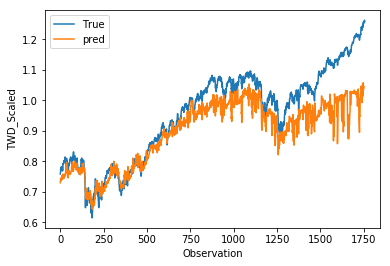

y_pred.shape: (1756,)
y_test_rsquare.shape: (1756,)
R-Squared: 0.670748
The Adjusted R2 score on the Test set is:	0.662
my R-Squared: 0.964904
raw R-Squared: 0.993832
np R-Squared: 0.879610
statsmodels__r2_test: 0.879610


In [61]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
#y_pred是三天前就知道，所以往前移三格
y_pred = y_pred[:,-1]
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))


my_r2_test =get_my_r2_python(y_test_rsquare, y_pred)
print('my R-Squared: %f'%(my_r2_test))

raw_r2_test=get_r2_python(y_test_rsquare, y_pred)
print('raw R-Squared: %f'%(raw_r2_test))

np_r2_test=get_r2_numpy(y_test_rsquare, y_pred)
print('np R-Squared: %f'%(np_r2_test))

statsmodels__r2_test=get_r2_statsmodels(y_test_rsquare, y_pred)
print('statsmodels__r2_test: %f'%(statsmodels__r2_test))



In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_1l_50n.csv', mode='w', header=True, index=False)

# tcn

In [29]:
#tcn selu

In [30]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=2, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=500, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/500
6808/6808 [==============================] - 10s 1ms/step - loss: 4.8080 - val_loss: 1.1497
Epoch 2/500
6808/6808 [==============================] - 7s 1ms/step - loss: 1.1364 - val_loss: 0.1057
Epoch 3/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.3846 - val_loss: 0.2512
Epoch 4/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.1580 - val_loss: 0.0067
Epoch 5/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0712 - val_loss: 0.2578
Epoch 6/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0555 - val_loss: 0.0835
Epoch 7/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0289 - val_loss: 0.0850
Epoch 8/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0273 - val_loss: 0.1190
Epoch 9/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0237 - val_loss: 0.0752
Epoch 10/500
6808/6808 [=

6808/6808 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0718
Epoch 80/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0010 - val_loss: 0.0706
Epoch 81/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0737
Epoch 82/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0010 - val_loss: 0.0707
Epoch 83/500
6808/6808 [==============================] - 7s 1ms/step - loss: 9.5519e-04 - val_loss: 0.0720
Epoch 84/500
6808/6808 [==============================] - 7s 1ms/step - loss: 9.8229e-04 - val_loss: 0.0747
Epoch 85/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0710
Epoch 86/500
6808/6808 [==============================] - 7s 1ms/step - loss: 9.7445e-04 - val_loss: 0.0733
Epoch 87/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0743
Epoch 88/500
6808/6808 [==============================] - 7s 1ms/

6808/6808 [==============================] - 7s 1ms/step - loss: 8.4124e-04 - val_loss: 0.0501
Epoch 231/500
6808/6808 [==============================] - 7s 1ms/step - loss: 9.8953e-04 - val_loss: 0.0531
Epoch 232/500
6808/6808 [==============================] - 7s 1ms/step - loss: 9.5859e-04 - val_loss: 0.0535
Epoch 233/500
6808/6808 [==============================] - 7s 1ms/step - loss: 9.5115e-04 - val_loss: 0.0536
Epoch 234/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0559
Epoch 235/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0012 - val_loss: 0.0563
Epoch 236/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0012 - val_loss: 0.0566
Epoch 237/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0579
Epoch 238/500
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0012 - val_loss: 0.0581
Epoch 239/500
6808/6808 [============================

6808/6808 [==============================] - 7s 1ms/step - loss: 3.5729e-04 - val_loss: 0.0431
Epoch 382/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.5442e-04 - val_loss: 0.0445
Epoch 383/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.8109e-04 - val_loss: 0.0436
Epoch 384/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.8744e-04 - val_loss: 0.0415
Epoch 385/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.7246e-04 - val_loss: 0.0448
Epoch 386/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.8289e-04 - val_loss: 0.0463
Epoch 387/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.8240e-04 - val_loss: 0.0440
Epoch 388/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.6035e-04 - val_loss: 0.0439
Epoch 389/500
6808/6808 [==============================] - 7s 1ms/step - loss: 3.6199e-04 - val_loss: 0.0437
Epoch 390/500
6808/6808 [========

6808/6808 [==============================] - 7s 1ms/step - loss: 4.5489e-04 - val_loss: 0.0373
Epoch 457/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.2669e-04 - val_loss: 0.0344
Epoch 458/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.2441e-04 - val_loss: 0.0346
Epoch 459/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.3481e-04 - val_loss: 0.0336
Epoch 460/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.9012e-04 - val_loss: 0.0365
Epoch 461/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.2194e-04 - val_loss: 0.0343
Epoch 462/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.3068e-04 - val_loss: 0.0336
Epoch 463/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.8553e-04 - val_loss: 0.0330
Epoch 464/500
6808/6808 [==============================] - 7s 1ms/step - loss: 4.9860e-04 - val_loss: 0.0341
Epoch 465/500
6808/6808 [========

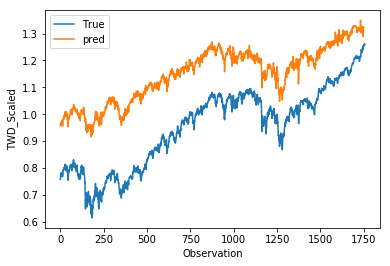

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: -0.913624
The Adjusted R2 score on the Test set is:	-0.965


In [31]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

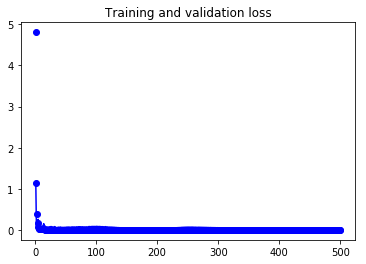

In [32]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_1l_50n.csv', mode='w', header=True, index=False)

In [ ]:
#tcn2

In [34]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)

history_model = model.fit(X_tr_t, y_train, epochs=500, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_2[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/500
6808/6808 [==============================] - 5s 766us/step - loss: 0.4075 - val_loss: 0.2687
Epoch 2/500
6808/6808 [==============================] - 4s 584us/step - loss: 0.0860 - val_loss: 0.1146
Epoch 3/500
6808/6808 [==============================] - 4s 583us/step - loss: 0.0409 - val_loss: 0.0947
Epoch 4/500
6808/6808 [==============================] - 4s 586us/step - loss: 0.0244 - val_loss: 0.0848
Epoch 5/500
6808/6808 [==============================] - 4s 582us/step - loss: 0.0179 - val_loss: 0.0183
Epoch 6/500
6808/6808 [==============================] - 4s 582us/step - loss: 0.0116 - val_loss: 0.0510
Epoch 7/500
6808/6808 [==============================] - 4s 583us/step - loss: 0.0088 - val_loss: 0.0925
Epoch 8/500
6808/6808 [==============================] - 4s 582us/step - loss: 0.0079 - val_loss: 0.0849
Epoch 9/500
6808/6808 [==============================] - 4s 584us/step - loss: 0.0082 - val_loss: 0.1308
Epoch 10

6808/6808 [==============================] - 4s 599us/step - loss: 2.0011e-04 - val_loss: 0.0035
Epoch 151/500
6808/6808 [==============================] - 4s 581us/step - loss: 2.1947e-04 - val_loss: 0.0035
Epoch 152/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.8432e-04 - val_loss: 0.0029
Epoch 153/500
6808/6808 [==============================] - 4s 580us/step - loss: 2.2309e-04 - val_loss: 0.0041
Epoch 154/500
6808/6808 [==============================] - 4s 581us/step - loss: 2.3317e-04 - val_loss: 0.0042
Epoch 155/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.9951e-04 - val_loss: 0.0042
Epoch 156/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.9140e-04 - val_loss: 0.0046
Epoch 157/500
6808/6808 [==============================] - 4s 581us/step - loss: 2.0310e-04 - val_loss: 0.0045
Epoch 158/500
6808/6808 [==============================] - 4s 582us/step - loss: 1.7987e-04 - val_loss: 0.0039
Epoch 159/500
6

Epoch 224/500
6808/6808 [==============================] - 4s 581us/step - loss: 1.6503e-04 - val_loss: 0.0138
Epoch 225/500
6808/6808 [==============================] - 4s 582us/step - loss: 1.7504e-04 - val_loss: 0.0145
Epoch 226/500
6808/6808 [==============================] - 4s 587us/step - loss: 1.6381e-04 - val_loss: 0.0169
Epoch 227/500
6808/6808 [==============================] - 4s 581us/step - loss: 1.5237e-04 - val_loss: 0.0185
Epoch 228/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.8136e-04 - val_loss: 0.0152
Epoch 229/500
6808/6808 [==============================] - 4s 583us/step - loss: 1.5165e-04 - val_loss: 0.0106
Epoch 230/500
6808/6808 [==============================] - 4s 582us/step - loss: 1.6727e-04 - val_loss: 0.0115
Epoch 231/500
6808/6808 [==============================] - 4s 586us/step - loss: 1.5220e-04 - val_loss: 0.0094
Epoch 232/500
6808/6808 [==============================] - 4s 587us/step - loss: 1.5008e-04 - val_loss: 0.0126
E

Epoch 298/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.2777e-04 - val_loss: 0.0129
Epoch 299/500
6808/6808 [==============================] - 4s 580us/step - loss: 1.3146e-04 - val_loss: 0.0168
Epoch 300/500
6808/6808 [==============================] - 4s 583us/step - loss: 1.3238e-04 - val_loss: 0.0161
Epoch 301/500
6808/6808 [==============================] - 4s 583us/step - loss: 1.3530e-04 - val_loss: 0.0145
Epoch 302/500
6808/6808 [==============================] - 4s 582us/step - loss: 1.1676e-04 - val_loss: 0.0144
Epoch 303/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.3077e-04 - val_loss: 0.0183
Epoch 304/500
6808/6808 [==============================] - 4s 583us/step - loss: 1.2549e-04 - val_loss: 0.0132
Epoch 305/500
6808/6808 [==============================] - 4s 582us/step - loss: 1.2527e-04 - val_loss: 0.0110
Epoch 306/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.2632e-04 - val_loss: 0.0107
E

Epoch 372/500
6808/6808 [==============================] - 4s 583us/step - loss: 1.0723e-04 - val_loss: 0.0100
Epoch 373/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.0815e-04 - val_loss: 0.0125
Epoch 374/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.2618e-04 - val_loss: 0.0085
Epoch 375/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.1440e-04 - val_loss: 0.0061
Epoch 376/500
6808/6808 [==============================] - 4s 582us/step - loss: 1.1603e-04 - val_loss: 0.0058
Epoch 377/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.0578e-04 - val_loss: 0.0048
Epoch 378/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.0582e-04 - val_loss: 0.0067
Epoch 379/500
6808/6808 [==============================] - 4s 578us/step - loss: 1.1714e-04 - val_loss: 0.0049
Epoch 380/500
6808/6808 [==============================] - 4s 586us/step - loss: 1.0972e-04 - val_loss: 0.0091
E

Epoch 446/500
6808/6808 [==============================] - 4s 586us/step - loss: 1.0133e-04 - val_loss: 0.0078
Epoch 447/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.0858e-04 - val_loss: 0.0086
Epoch 448/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.0526e-04 - val_loss: 0.0083
Epoch 449/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.0583e-04 - val_loss: 0.0094
Epoch 450/500
6808/6808 [==============================] - 4s 584us/step - loss: 1.0751e-04 - val_loss: 0.0063
Epoch 451/500
6808/6808 [==============================] - 4s 585us/step - loss: 1.0611e-04 - val_loss: 0.0069
Epoch 452/500
6808/6808 [==============================] - 4s 586us/step - loss: 1.0449e-04 - val_loss: 0.0067
Epoch 453/500
6808/6808 [==============================] - 4s 587us/step - loss: 9.5340e-05 - val_loss: 0.0086
Epoch 454/500
6808/6808 [==============================] - 4s 586us/step - loss: 1.0418e-04 - val_loss: 0.0108
E

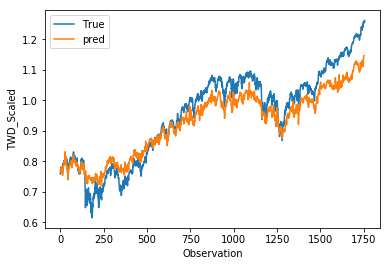

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.869919
The Adjusted R2 score on the Test set is:	0.866


In [35]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

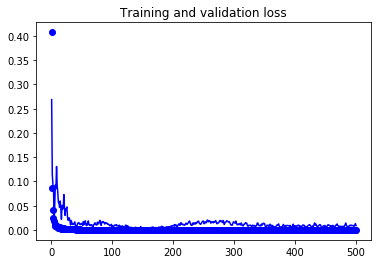

In [36]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [37]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn2.csv', mode='w', header=True, index=False)

In [33]:
#tcn3 dilation=16

In [34]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

6808/6808 [==============================] - 3s 431us/step - loss: 0.0043 - val_loss: 0.0518
Epoch 11/400
6808/6808 [==============================] - 3s 432us/step - loss: 0.0023 - val_loss: 0.0549
Epoch 12/400
6808/6808 [==============================] - 3s 431us/step - loss: 0.0024 - val_loss: 0.0833
Epoch 13/400
6808/6808 [==============================] - 3s 434us/step - loss: 0.0058 - val_loss: 0.0776
Epoch 14/400
6808/6808 [==============================] - 3s 432us/step - loss: 0.0019 - val_loss: 0.0840
Epoch 15/400
6808/6808 [==============================] - 3s 429us/step - loss: 0.0020 - val_loss: 0.0751
Epoch 16/400
6808/6808 [==============================] - 3s 434us/step - loss: 0.0020 - val_loss: 0.0778
Epoch 17/400
6808/6808 [==============================] - 3s 432us/step - loss: 0.0051 - val_loss: 0.0594
Epoch 18/400
6808/6808 [==============================] - 3s 433us/step - loss: 0.0023 - val_loss: 0.0541
Epoch 19/400
6808/6808 [==============================] - 3

6808/6808 [==============================] - 3s 440us/step - loss: 9.9066e-04 - val_loss: 0.0166
Epoch 160/400
6808/6808 [==============================] - 3s 441us/step - loss: 3.4262e-04 - val_loss: 0.0159
Epoch 161/400
6808/6808 [==============================] - 3s 440us/step - loss: 3.5235e-04 - val_loss: 0.0168
Epoch 162/400
6808/6808 [==============================] - 3s 438us/step - loss: 3.2774e-04 - val_loss: 0.0173
Epoch 163/400
6808/6808 [==============================] - 3s 442us/step - loss: 3.2070e-04 - val_loss: 0.0193
Epoch 164/400
6808/6808 [==============================] - 3s 442us/step - loss: 2.8154e-04 - val_loss: 0.0188
Epoch 165/400
6808/6808 [==============================] - 3s 443us/step - loss: 2.9133e-04 - val_loss: 0.0164
Epoch 166/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.8782e-04 - val_loss: 0.0175
Epoch 167/400
6808/6808 [==============================] - 3s 442us/step - loss: 2.8180e-04 - val_loss: 0.0180
Epoch 168/400
6

Epoch 233/400
6808/6808 [==============================] - 3s 434us/step - loss: 2.5057e-04 - val_loss: 0.0158
Epoch 234/400
6808/6808 [==============================] - 3s 437us/step - loss: 2.5653e-04 - val_loss: 0.0131
Epoch 235/400
6808/6808 [==============================] - 3s 440us/step - loss: 2.2946e-04 - val_loss: 0.0174
Epoch 236/400
6808/6808 [==============================] - 3s 435us/step - loss: 2.2119e-04 - val_loss: 0.0188
Epoch 237/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.7993e-04 - val_loss: 0.0159
Epoch 238/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.2582e-04 - val_loss: 0.0162
Epoch 239/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.1734e-04 - val_loss: 0.0149
Epoch 240/400
6808/6808 [==============================] - 3s 436us/step - loss: 2.1564e-04 - val_loss: 0.0146
Epoch 241/400
6808/6808 [==============================] - 3s 438us/step - loss: 2.2948e-04 - val_loss: 0.0214
E

Epoch 307/400
6808/6808 [==============================] - 3s 436us/step - loss: 2.5222e-04 - val_loss: 0.0237
Epoch 308/400
6808/6808 [==============================] - 3s 435us/step - loss: 2.5886e-04 - val_loss: 0.0228
Epoch 309/400
6808/6808 [==============================] - 3s 437us/step - loss: 2.6454e-04 - val_loss: 0.0174
Epoch 310/400
6808/6808 [==============================] - 3s 437us/step - loss: 2.5059e-04 - val_loss: 0.0180
Epoch 311/400
6808/6808 [==============================] - 3s 435us/step - loss: 2.3358e-04 - val_loss: 0.0114
Epoch 312/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.6767e-04 - val_loss: 0.0064
Epoch 313/400
6808/6808 [==============================] - 3s 437us/step - loss: 3.8846e-04 - val_loss: 0.0158
Epoch 314/400
6808/6808 [==============================] - 3s 437us/step - loss: 3.2601e-04 - val_loss: 0.0185
Epoch 315/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.7127e-04 - val_loss: 0.0181
E

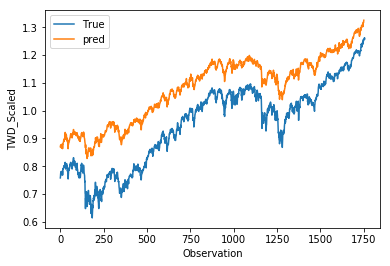

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.194935
The Adjusted R2 score on the Test set is:	0.173


In [35]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

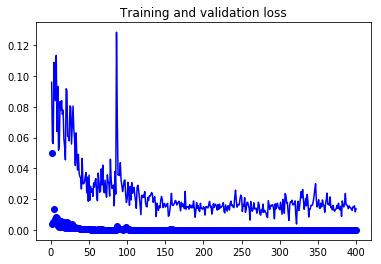

In [36]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [37]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn3.csv', mode='w', header=True, index=False)

In [38]:
#tcn4

In [39]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_2[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

6808/6808 [==============================] - 3s 439us/step - loss: 0.0032 - val_loss: 0.0800
Epoch 11/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0047 - val_loss: 0.0960
Epoch 12/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0046 - val_loss: 0.0597
Epoch 13/400
6808/6808 [==============================] - 3s 442us/step - loss: 0.0030 - val_loss: 0.0790
Epoch 14/400
6808/6808 [==============================] - 3s 437us/step - loss: 0.0041 - val_loss: 0.0512
Epoch 15/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0018 - val_loss: 0.0487
Epoch 16/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0025 - val_loss: 0.0838
Epoch 17/400
6808/6808 [==============================] - 3s 437us/step - loss: 0.0037 - val_loss: 0.0490
Epoch 18/400
6808/6808 [==============================] - 3s 442us/step - loss: 0.0015 - val_loss: 0.0594
Epoch 19/400
6808/6808 [==============================] - E

6808/6808 [==============================] - 3s 443us/step - loss: 2.4999e-04 - val_loss: 0.0214
Epoch 160/400
6808/6808 [==============================] - 3s 447us/step - loss: 2.8897e-04 - val_loss: 0.0215
Epoch 161/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.7801e-04 - val_loss: 0.0276
Epoch 162/400
6808/6808 [==============================] - 3s 441us/step - loss: 3.0524e-04 - val_loss: 0.0255
Epoch 163/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.7148e-04 - val_loss: 0.0210
Epoch 164/400
6808/6808 [==============================] - 3s 442us/step - loss: 2.8617e-04 - val_loss: 0.0223
Epoch 165/400
6808/6808 [==============================] - 3s 445us/step - loss: 8.0080e-04 - val_loss: 0.0156
Epoch 166/400
6808/6808 [==============================] - 3s 442us/step - loss: 9.6148e-04 - val_loss: 0.0572
Epoch 167/400
6808/6808 [==============================] - 3s 444us/step - loss: 0.0020 - val_loss: 0.0641
Epoch 168/400
6808/

Epoch 307/400
6808/6808 [==============================] - 3s 446us/step - loss: 1.9803e-04 - val_loss: 0.0185
Epoch 308/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.2713e-04 - val_loss: 0.0102
Epoch 309/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.4362e-04 - val_loss: 0.0146
Epoch 310/400
6808/6808 [==============================] - 3s 443us/step - loss: 2.6768e-04 - val_loss: 0.0239
Epoch 311/400
6808/6808 [==============================] - 3s 446us/step - loss: 2.8286e-04 - val_loss: 0.0139
Epoch 312/400
6808/6808 [==============================] - 3s 445us/step - loss: 2.3004e-04 - val_loss: 0.0187
Epoch 313/400
6808/6808 [==============================] - 3s 447us/step - loss: 2.0841e-04 - val_loss: 0.0171
Epoch 314/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.4803e-04 - val_loss: 0.0110
Epoch 315/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.2692e-04 - val_loss: 0.0194
E

Epoch 381/400
6808/6808 [==============================] - 3s 466us/step - loss: 2.1261e-04 - val_loss: 0.0198
Epoch 382/400
6808/6808 [==============================] - 3s 466us/step - loss: 2.0578e-04 - val_loss: 0.0187
Epoch 383/400
6808/6808 [==============================] - 3s 469us/step - loss: 2.1425e-04 - val_loss: 0.0203
Epoch 384/400
6808/6808 [==============================] - 3s 471us/step - loss: 2.1373e-04 - val_loss: 0.0181
Epoch 385/400
6808/6808 [==============================] - 3s 471us/step - loss: 2.7023e-04 - val_loss: 0.0169
Epoch 386/400
6808/6808 [==============================] - 3s 465us/step - loss: 4.7712e-04 - val_loss: 0.0203
Epoch 387/400
6808/6808 [==============================] - 3s 466us/step - loss: 2.7558e-04 - val_loss: 0.0178
Epoch 388/400
6808/6808 [==============================] - 3s 474us/step - loss: 2.4184e-04 - val_loss: 0.0175
Epoch 389/400
6808/6808 [==============================] - 3s 467us/step - loss: 2.1775e-04 - val_loss: 0.0212
E

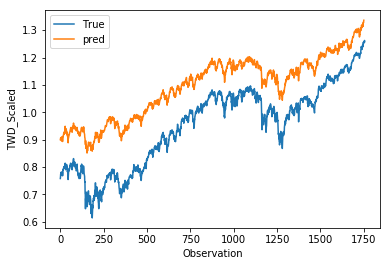

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.017615
The Adjusted R2 score on the Test set is:	-0.009


In [40]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

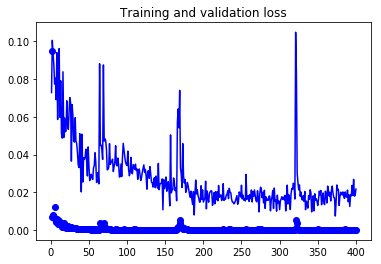

In [41]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [42]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn4.csv', mode='w', header=True, index=False)

In [43]:
#tcn5

In [63]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.4, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_7[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

6808/6808 [==============================] - 3s 511us/step - loss: 0.0043 - val_loss: 0.0038
Epoch 11/600
6808/6808 [==============================] - 3s 507us/step - loss: 0.0033 - val_loss: 0.0029
Epoch 12/600
6808/6808 [==============================] - 3s 510us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 13/600
6808/6808 [==============================] - 3s 508us/step - loss: 0.0024 - val_loss: 0.0030
Epoch 14/600
6808/6808 [==============================] - 3s 507us/step - loss: 0.0022 - val_loss: 0.0027
Epoch 15/600
6808/6808 [==============================] - 3s 511us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 16/600
6808/6808 [==============================] - 3s 508us/step - loss: 0.0019 - val_loss: 0.0020
Epoch 17/600
6808/6808 [==============================] - 3s 507us/step - loss: 0.0016 - val_loss: 0.0029
Epoch 18/600
6808/6808 [==============================] - 4s 515us/step - loss: 0.0015 - val_loss: 0.0021
Epoch 19/600
6808/6808 [==============================] - 3

Epoch 159/600
6808/6808 [==============================] - 3s 508us/step - loss: 1.9759e-04 - val_loss: 0.0054
Epoch 160/600
6808/6808 [==============================] - 3s 505us/step - loss: 2.0690e-04 - val_loss: 0.0055
Epoch 161/600
6808/6808 [==============================] - 3s 506us/step - loss: 2.0390e-04 - val_loss: 0.0059
Epoch 162/600
6808/6808 [==============================] - 3s 505us/step - loss: 2.0186e-04 - val_loss: 0.0061
Epoch 163/600
6808/6808 [==============================] - 3s 507us/step - loss: 2.0422e-04 - val_loss: 0.0084
Epoch 164/600
6808/6808 [==============================] - 3s 504us/step - loss: 2.0424e-04 - val_loss: 0.0068
Epoch 165/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.9561e-04 - val_loss: 0.0081
Epoch 166/600
6808/6808 [==============================] - 3s 506us/step - loss: 2.0084e-04 - val_loss: 0.0063
Epoch 167/600
6808/6808 [==============================] - 3s 502us/step - loss: 2.0058e-04 - val_loss: 0.0063
E

Epoch 233/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.6471e-04 - val_loss: 0.0078
Epoch 234/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.6116e-04 - val_loss: 0.0095
Epoch 235/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.6167e-04 - val_loss: 0.0078
Epoch 236/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.6088e-04 - val_loss: 0.0075
Epoch 237/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.6455e-04 - val_loss: 0.0072
Epoch 238/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.5642e-04 - val_loss: 0.0084
Epoch 239/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.6015e-04 - val_loss: 0.0075
Epoch 240/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.5844e-04 - val_loss: 0.0075
Epoch 241/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.5795e-04 - val_loss: 0.0093
E

Epoch 307/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.2944e-04 - val_loss: 0.0089
Epoch 308/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.3123e-04 - val_loss: 0.0089
Epoch 309/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.2628e-04 - val_loss: 0.0079
Epoch 310/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.3052e-04 - val_loss: 0.0090
Epoch 311/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.2693e-04 - val_loss: 0.0093
Epoch 312/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.3635e-04 - val_loss: 0.0093
Epoch 313/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.3516e-04 - val_loss: 0.0103
Epoch 314/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.3085e-04 - val_loss: 0.0093
Epoch 315/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.4050e-04 - val_loss: 0.0089
E

Epoch 381/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.1006e-04 - val_loss: 0.0113
Epoch 382/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1295e-04 - val_loss: 0.0091
Epoch 383/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1215e-04 - val_loss: 0.0107
Epoch 384/600
6808/6808 [==============================] - 3s 501us/step - loss: 1.1459e-04 - val_loss: 0.0101
Epoch 385/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.1267e-04 - val_loss: 0.0110
Epoch 386/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1276e-04 - val_loss: 0.0114
Epoch 387/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1026e-04 - val_loss: 0.0106
Epoch 388/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1420e-04 - val_loss: 0.0106
Epoch 389/600
6808/6808 [==============================] - 3s 501us/step - loss: 1.1515e-04 - val_loss: 0.0108
E

Epoch 455/600
6808/6808 [==============================] - 3s 503us/step - loss: 9.5927e-05 - val_loss: 0.0117
Epoch 456/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.0042e-04 - val_loss: 0.0110
Epoch 457/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.0009e-04 - val_loss: 0.0107
Epoch 458/600
6808/6808 [==============================] - 3s 504us/step - loss: 9.8993e-05 - val_loss: 0.0124
Epoch 459/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.0033e-04 - val_loss: 0.0095
Epoch 460/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.0273e-04 - val_loss: 0.0113
Epoch 461/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.0036e-04 - val_loss: 0.0103
Epoch 462/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.0390e-04 - val_loss: 0.0099
Epoch 463/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.1061e-04 - val_loss: 0.0115
E

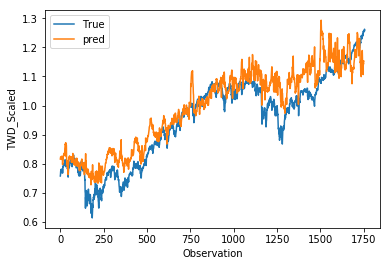

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.802703
The Adjusted R2 score on the Test set is:	0.797


In [64]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

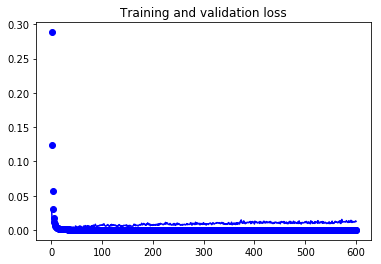

In [65]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [66]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn5.csv', mode='w', header=True, index=False)

In [67]:
#tcn6 tcn6~8 dila=32 dr=0.2~0.4

In [68]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_8[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_46 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/600
6808/6808 [==============================] - 6s 817us/step - loss: 0.1703 - val_loss: 0.1968
Epoch 2/600
6808/6808 [==============================] - 4s 581us/step - loss: 0.0702 - val_loss: 0.0957
Epoch 3/600
6808/6808 [==============================] - 4s 581us/step - loss: 0.0349 - val_loss: 0.0609
Epoch 4/600
6808/6808 [==============================] - 4s 582us/step - loss: 0.0210 - val_loss: 0.0630
Epoch 5/600
6808/6808 [==============================] - 4s 577us/step - loss: 0.0155 - val_loss: 0.0652
Epoch 6/600
6808/6808 [==============================] - 4s 577us/step - loss: 0.0111 - val_loss: 0.0580
Epoch 7/600
6808/6808 [==============================] - 4s 578us/step - loss: 0.0090 - val_loss: 0.0548
Epoch 8/600
6808/6808 [==============================] - 4s 577us/step - loss: 0.0074 - val_loss: 0.0494
Epoch 9/600
6808/6808 [==============================] - 4s 581us/step - loss: 0.0058 - val_loss: 0.0542
Epoch 10

6808/6808 [==============================] - 4s 577us/step - loss: 2.5918e-04 - val_loss: 0.0074
Epoch 77/600
6808/6808 [==============================] - 4s 581us/step - loss: 2.7648e-04 - val_loss: 0.0092
Epoch 78/600
6808/6808 [==============================] - 4s 582us/step - loss: 2.5874e-04 - val_loss: 0.0114
Epoch 79/600
6808/6808 [==============================] - 4s 580us/step - loss: 2.3262e-04 - val_loss: 0.0083
Epoch 80/600
6808/6808 [==============================] - 4s 577us/step - loss: 2.3746e-04 - val_loss: 0.0085
Epoch 81/600
6808/6808 [==============================] - 4s 579us/step - loss: 2.3054e-04 - val_loss: 0.0085
Epoch 82/600
6808/6808 [==============================] - 4s 577us/step - loss: 2.4724e-04 - val_loss: 0.0097
Epoch 83/600
6808/6808 [==============================] - 4s 579us/step - loss: 2.5875e-04 - val_loss: 0.0100
Epoch 84/600
6808/6808 [==============================] - 4s 580us/step - loss: 2.3970e-04 - val_loss: 0.0095
Epoch 85/600
6808/6808 

Epoch 224/600
6808/6808 [==============================] - 4s 579us/step - loss: 1.2608e-04 - val_loss: 0.0175
Epoch 225/600
6808/6808 [==============================] - 4s 582us/step - loss: 1.2469e-04 - val_loss: 0.0167
Epoch 226/600
6808/6808 [==============================] - 4s 580us/step - loss: 1.2344e-04 - val_loss: 0.0127
Epoch 227/600
6808/6808 [==============================] - 4s 582us/step - loss: 1.2465e-04 - val_loss: 0.0128
Epoch 228/600
6808/6808 [==============================] - 4s 582us/step - loss: 1.1835e-04 - val_loss: 0.0138
Epoch 229/600
6808/6808 [==============================] - 4s 579us/step - loss: 1.1652e-04 - val_loss: 0.0152
Epoch 230/600
6808/6808 [==============================] - 4s 581us/step - loss: 1.1797e-04 - val_loss: 0.0150
Epoch 231/600
6808/6808 [==============================] - 4s 581us/step - loss: 1.2411e-04 - val_loss: 0.0161
Epoch 232/600
6808/6808 [==============================] - 4s 580us/step - loss: 1.4084e-04 - val_loss: 0.0207
E

Epoch 298/600
6808/6808 [==============================] - 4s 585us/step - loss: 1.1359e-04 - val_loss: 0.0112
Epoch 299/600
6808/6808 [==============================] - 4s 580us/step - loss: 9.9142e-05 - val_loss: 0.0114
Epoch 300/600
6808/6808 [==============================] - 4s 587us/step - loss: 1.1089e-04 - val_loss: 0.0155
Epoch 301/600
6808/6808 [==============================] - 4s 579us/step - loss: 1.1351e-04 - val_loss: 0.0165
Epoch 302/600
6808/6808 [==============================] - 4s 579us/step - loss: 1.1205e-04 - val_loss: 0.0114
Epoch 303/600
6808/6808 [==============================] - 4s 580us/step - loss: 1.1439e-04 - val_loss: 0.0157
Epoch 304/600
6808/6808 [==============================] - 4s 582us/step - loss: 1.0651e-04 - val_loss: 0.0120
Epoch 305/600
6808/6808 [==============================] - 4s 580us/step - loss: 1.1731e-04 - val_loss: 0.0090
Epoch 306/600
6808/6808 [==============================] - 4s 584us/step - loss: 1.0768e-04 - val_loss: 0.0128
E

6808/6808 [==============================] - 4s 582us/step - loss: 8.5819e-05 - val_loss: 0.0086
Epoch 445/600
6808/6808 [==============================] - 4s 580us/step - loss: 8.1750e-05 - val_loss: 0.0118
Epoch 446/600
6808/6808 [==============================] - 4s 586us/step - loss: 8.7783e-05 - val_loss: 0.0102
Epoch 447/600
6808/6808 [==============================] - 4s 579us/step - loss: 9.5145e-05 - val_loss: 0.0122
Epoch 448/600
6808/6808 [==============================] - 4s 578us/step - loss: 1.0768e-04 - val_loss: 0.0086
Epoch 449/600
6808/6808 [==============================] - 4s 583us/step - loss: 1.1850e-04 - val_loss: 0.0068
Epoch 450/600
6808/6808 [==============================] - 4s 584us/step - loss: 9.6199e-05 - val_loss: 0.0085
Epoch 451/600
6808/6808 [==============================] - 4s 584us/step - loss: 9.2195e-05 - val_loss: 0.0095
Epoch 452/600
6808/6808 [==============================] - 4s 586us/step - loss: 8.5305e-05 - val_loss: 0.0100
Epoch 453/600
6

Epoch 518/600
6808/6808 [==============================] - 4s 582us/step - loss: 8.1419e-05 - val_loss: 0.0087
Epoch 519/600
6808/6808 [==============================] - 4s 582us/step - loss: 7.9738e-05 - val_loss: 0.0111
Epoch 520/600
6808/6808 [==============================] - 4s 577us/step - loss: 8.3384e-05 - val_loss: 0.0102
Epoch 521/600
6808/6808 [==============================] - 4s 580us/step - loss: 8.4535e-05 - val_loss: 0.0068
Epoch 522/600
6808/6808 [==============================] - 4s 584us/step - loss: 9.2114e-05 - val_loss: 0.0076
Epoch 523/600
6808/6808 [==============================] - 4s 584us/step - loss: 8.8613e-05 - val_loss: 0.0095
Epoch 524/600
6808/6808 [==============================] - 4s 581us/step - loss: 7.7082e-05 - val_loss: 0.0097
Epoch 525/600
6808/6808 [==============================] - 4s 584us/step - loss: 7.7986e-05 - val_loss: 0.0078
Epoch 526/600
6808/6808 [==============================] - 4s 583us/step - loss: 7.8242e-05 - val_loss: 0.0097
E

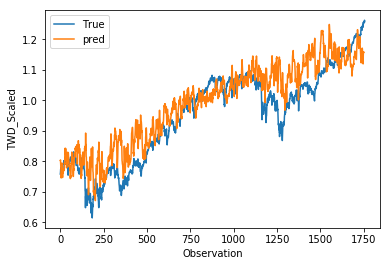

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.756889
The Adjusted R2 score on the Test set is:	0.750


In [69]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

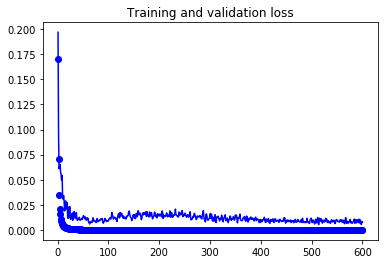

In [70]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [71]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn6.csv', mode='w', header=True, index=False)

In [72]:
#tcn7 tcn6~8 dila=32 dr=0.2~0.4

In [73]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_9[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_53 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/600
6808/6808 [==============================] - 6s 840us/step - loss: 0.2260 - val_loss: 0.1741
Epoch 2/600
6808/6808 [==============================] - 4s 591us/step - loss: 0.1036 - val_loss: 0.0563
Epoch 3/600
6808/6808 [==============================] - 4s 585us/step - loss: 0.0501 - val_loss: 0.0136
Epoch 4/600
6808/6808 [==============================] - 4s 584us/step - loss: 0.0289 - val_loss: 0.0109
Epoch 5/600
6808/6808 [==============================] - 4s 586us/step - loss: 0.0198 - val_loss: 0.0098
Epoch 6/600
6808/6808 [==============================] - 4s 585us/step - loss: 0.0140 - val_loss: 0.0114
Epoch 7/600
6808/6808 [==============================] - 4s 584us/step - loss: 0.0105 - val_loss: 0.0106
Epoch 8/600
6808/6808 [==============================] - 4s 584us/step - loss: 0.0083 - val_loss: 0.0065
Epoch 9/600
6808/6808 [==============================] - 4s 586us/step - loss: 0.0069 - val_loss: 0.0054
Epoch 10

6808/6808 [==============================] - 4s 587us/step - loss: 2.6473e-04 - val_loss: 0.0030
Epoch 77/600
6808/6808 [==============================] - 4s 588us/step - loss: 2.5501e-04 - val_loss: 0.0036
Epoch 78/600
6808/6808 [==============================] - 4s 587us/step - loss: 2.6505e-04 - val_loss: 0.0039
Epoch 79/600
6808/6808 [==============================] - 4s 585us/step - loss: 2.6788e-04 - val_loss: 0.0049
Epoch 80/600
6808/6808 [==============================] - 4s 586us/step - loss: 2.6418e-04 - val_loss: 0.0057
Epoch 81/600
6808/6808 [==============================] - 4s 585us/step - loss: 2.7281e-04 - val_loss: 0.0050
Epoch 82/600
6808/6808 [==============================] - 4s 584us/step - loss: 2.6302e-04 - val_loss: 0.0059
Epoch 83/600
6808/6808 [==============================] - 4s 586us/step - loss: 2.4508e-04 - val_loss: 0.0045
Epoch 84/600
6808/6808 [==============================] - 4s 585us/step - loss: 2.5848e-04 - val_loss: 0.0051
Epoch 85/600
6808/6808 

Epoch 224/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.3602e-04 - val_loss: 0.0045
Epoch 225/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.3111e-04 - val_loss: 0.0039
Epoch 226/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.4300e-04 - val_loss: 0.0038
Epoch 227/600
6808/6808 [==============================] - 4s 587us/step - loss: 1.3031e-04 - val_loss: 0.0040
Epoch 228/600
6808/6808 [==============================] - 4s 588us/step - loss: 1.3109e-04 - val_loss: 0.0044
Epoch 229/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.3225e-04 - val_loss: 0.0054
Epoch 230/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.3399e-04 - val_loss: 0.0049
Epoch 231/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.3466e-04 - val_loss: 0.0061
Epoch 232/600
6808/6808 [==============================] - 4s 587us/step - loss: 1.4304e-04 - val_loss: 0.0042
E

Epoch 298/600
6808/6808 [==============================] - 4s 585us/step - loss: 1.1163e-04 - val_loss: 0.0054
Epoch 299/600
6808/6808 [==============================] - 4s 592us/step - loss: 1.1791e-04 - val_loss: 0.0042
Epoch 300/600
6808/6808 [==============================] - 4s 585us/step - loss: 1.1957e-04 - val_loss: 0.0039
Epoch 301/600
6808/6808 [==============================] - 4s 590us/step - loss: 1.1260e-04 - val_loss: 0.0054
Epoch 302/600
6808/6808 [==============================] - 4s 584us/step - loss: 1.1423e-04 - val_loss: 0.0048
Epoch 303/600
6808/6808 [==============================] - 4s 585us/step - loss: 1.0738e-04 - val_loss: 0.0042
Epoch 304/600
6808/6808 [==============================] - 4s 584us/step - loss: 1.0891e-04 - val_loss: 0.0049
Epoch 305/600
6808/6808 [==============================] - 4s 587us/step - loss: 1.1143e-04 - val_loss: 0.0046
Epoch 306/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.2791e-04 - val_loss: 0.0049
E

Epoch 372/600
6808/6808 [==============================] - 4s 588us/step - loss: 1.0342e-04 - val_loss: 0.0060
Epoch 373/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.0318e-04 - val_loss: 0.0059
Epoch 374/600
6808/6808 [==============================] - 4s 588us/step - loss: 9.9913e-05 - val_loss: 0.0048
Epoch 375/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.0029e-04 - val_loss: 0.0047
Epoch 376/600
6808/6808 [==============================] - 4s 587us/step - loss: 1.0557e-04 - val_loss: 0.0052
Epoch 377/600
6808/6808 [==============================] - 4s 589us/step - loss: 9.8569e-05 - val_loss: 0.0051
Epoch 378/600
6808/6808 [==============================] - 4s 590us/step - loss: 9.9828e-05 - val_loss: 0.0054
Epoch 379/600
6808/6808 [==============================] - 4s 587us/step - loss: 1.1308e-04 - val_loss: 0.0063
Epoch 380/600
6808/6808 [==============================] - 4s 588us/step - loss: 1.0473e-04 - val_loss: 0.0053
E

Epoch 519/600
6808/6808 [==============================] - 4s 586us/step - loss: 9.8449e-05 - val_loss: 0.0085
Epoch 520/600
6808/6808 [==============================] - 4s 591us/step - loss: 1.0458e-04 - val_loss: 0.0080
Epoch 521/600
6808/6808 [==============================] - 4s 588us/step - loss: 1.2139e-04 - val_loss: 0.0087
Epoch 522/600
6808/6808 [==============================] - 4s 586us/step - loss: 1.0390e-04 - val_loss: 0.0087
Epoch 523/600
6808/6808 [==============================] - 4s 587us/step - loss: 9.9893e-05 - val_loss: 0.0069
Epoch 524/600
6808/6808 [==============================] - 4s 589us/step - loss: 1.0300e-04 - val_loss: 0.0079
Epoch 525/600
6808/6808 [==============================] - 4s 589us/step - loss: 9.5581e-05 - val_loss: 0.0075
Epoch 526/600
6808/6808 [==============================] - 4s 587us/step - loss: 9.2202e-05 - val_loss: 0.0073
Epoch 527/600
6808/6808 [==============================] - 4s 588us/step - loss: 8.7538e-05 - val_loss: 0.0083
E

Epoch 593/600
6808/6808 [==============================] - 4s 587us/step - loss: 7.6138e-05 - val_loss: 0.0089
Epoch 594/600
6808/6808 [==============================] - 4s 588us/step - loss: 7.3695e-05 - val_loss: 0.0084
Epoch 595/600
6808/6808 [==============================] - 4s 596us/step - loss: 8.1092e-05 - val_loss: 0.0094
Epoch 596/600
6808/6808 [==============================] - 4s 590us/step - loss: 8.6765e-05 - val_loss: 0.0103
Epoch 597/600
6808/6808 [==============================] - 4s 588us/step - loss: 9.0740e-05 - val_loss: 0.0090
Epoch 598/600
6808/6808 [==============================] - 4s 591us/step - loss: 8.8469e-05 - val_loss: 0.0107
Epoch 599/600
6808/6808 [==============================] - 4s 591us/step - loss: 8.1919e-05 - val_loss: 0.0087
Epoch 600/600
6808/6808 [==============================] - 4s 589us/step - loss: 8.8733e-05 - val_loss: 0.0084


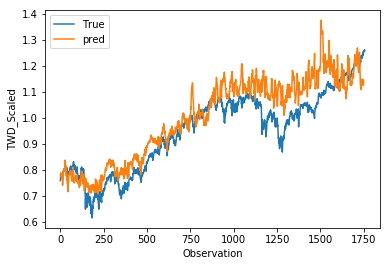

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.717449
The Adjusted R2 score on the Test set is:	0.710


In [74]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

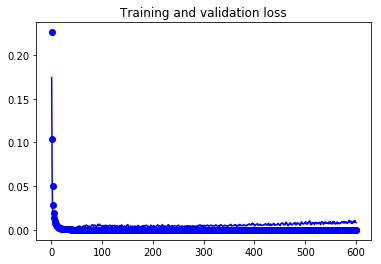

In [75]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [76]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn7.csv', mode='w', header=True, index=False)

In [77]:
#tcn8 tcn6~8 dila=32 dr=0.2~0.4

In [78]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.4, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_10[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_60 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/600
6808/6808 [==============================] - 6s 865us/step - loss: 0.3792 - val_loss: 0.2797
Epoch 2/600
6808/6808 [==============================] - 4s 601us/step - loss: 0.1555 - val_loss: 0.2752
Epoch 3/600
6808/6808 [==============================] - 4s 593us/step - loss: 0.0819 - val_loss: 0.1666
Epoch 4/600
6808/6808 [==============================] - 4s 591us/step - loss: 0.0478 - val_loss: 0.1237
Epoch 5/600
6808/6808 [==============================] - 4s 594us/step - loss: 0.0304 - val_loss: 0.1028
Epoch 6/600
6808/6808 [==============================] - 4s 591us/step - loss: 0.0200 - val_loss: 0.0547
Epoch 7/600
6808/6808 [==============================] - 4s 595us/step - loss: 0.0140 - val_loss: 0.0419
Epoch 8/600
6808/6808 [==============================] - 4s 589us/step - loss: 0.0105 - val_loss: 0.0338
Epoch 9/600
6808/6808 [==============================] - 4s 596us/step - loss: 0.0081 - val_loss: 0.0239
Epoch 10

6808/6808 [==============================] - 4s 617us/step - loss: 3.1497e-04 - val_loss: 0.0056
Epoch 77/600
6808/6808 [==============================] - 4s 613us/step - loss: 3.2402e-04 - val_loss: 0.0047
Epoch 78/600
6808/6808 [==============================] - 4s 635us/step - loss: 3.3484e-04 - val_loss: 0.0046
Epoch 79/600
6808/6808 [==============================] - 4s 623us/step - loss: 3.1740e-04 - val_loss: 0.0036
Epoch 80/600
6808/6808 [==============================] - 4s 619us/step - loss: 2.9177e-04 - val_loss: 0.0037
Epoch 81/600
6808/6808 [==============================] - 4s 607us/step - loss: 3.0536e-04 - val_loss: 0.0034
Epoch 82/600
6808/6808 [==============================] - 4s 612us/step - loss: 3.2717e-04 - val_loss: 0.0036
Epoch 83/600
6808/6808 [==============================] - 4s 603us/step - loss: 3.1326e-04 - val_loss: 0.0048
Epoch 84/600
6808/6808 [==============================] - 4s 615us/step - loss: 3.1357e-04 - val_loss: 0.0051
Epoch 85/600
6808/6808 

Epoch 224/600
6808/6808 [==============================] - 4s 596us/step - loss: 1.4984e-04 - val_loss: 0.0113
Epoch 225/600
6808/6808 [==============================] - 4s 594us/step - loss: 1.5824e-04 - val_loss: 0.0131
Epoch 226/600
6808/6808 [==============================] - 4s 598us/step - loss: 1.5330e-04 - val_loss: 0.0110
Epoch 227/600
6808/6808 [==============================] - 4s 598us/step - loss: 1.5348e-04 - val_loss: 0.0108
Epoch 228/600
6808/6808 [==============================] - 4s 596us/step - loss: 1.5066e-04 - val_loss: 0.0103
Epoch 229/600
6808/6808 [==============================] - 4s 596us/step - loss: 1.5021e-04 - val_loss: 0.0109
Epoch 230/600
6808/6808 [==============================] - 4s 596us/step - loss: 1.5024e-04 - val_loss: 0.0130
Epoch 231/600
6808/6808 [==============================] - 4s 599us/step - loss: 1.4793e-04 - val_loss: 0.0131
Epoch 232/600
6808/6808 [==============================] - 4s 601us/step - loss: 1.5543e-04 - val_loss: 0.0110
E

Epoch 298/600
6808/6808 [==============================] - 4s 598us/step - loss: 1.3080e-04 - val_loss: 0.0133
Epoch 299/600
6808/6808 [==============================] - 4s 596us/step - loss: 1.3419e-04 - val_loss: 0.0111
Epoch 300/600
6808/6808 [==============================] - 4s 596us/step - loss: 1.3102e-04 - val_loss: 0.0119
Epoch 301/600
6808/6808 [==============================] - 4s 597us/step - loss: 1.3382e-04 - val_loss: 0.0129
Epoch 302/600
6808/6808 [==============================] - 4s 595us/step - loss: 1.3184e-04 - val_loss: 0.0121
Epoch 303/600
6808/6808 [==============================] - 4s 598us/step - loss: 1.3059e-04 - val_loss: 0.0139
Epoch 304/600
6808/6808 [==============================] - 4s 601us/step - loss: 1.2947e-04 - val_loss: 0.0097
Epoch 305/600
6808/6808 [==============================] - 4s 594us/step - loss: 1.2563e-04 - val_loss: 0.0103
Epoch 306/600
6808/6808 [==============================] - 4s 598us/step - loss: 1.2933e-04 - val_loss: 0.0115
E

Epoch 372/600
6808/6808 [==============================] - 4s 592us/step - loss: 1.0408e-04 - val_loss: 0.0106
Epoch 373/600
6808/6808 [==============================] - 4s 596us/step - loss: 1.0800e-04 - val_loss: 0.0118
Epoch 374/600
6808/6808 [==============================] - 4s 591us/step - loss: 1.0813e-04 - val_loss: 0.0116
Epoch 375/600
6808/6808 [==============================] - 4s 598us/step - loss: 1.0712e-04 - val_loss: 0.0120
Epoch 376/600
6808/6808 [==============================] - 4s 599us/step - loss: 1.0867e-04 - val_loss: 0.0118
Epoch 377/600
6808/6808 [==============================] - 4s 593us/step - loss: 1.1269e-04 - val_loss: 0.0147
Epoch 378/600
6808/6808 [==============================] - 4s 593us/step - loss: 1.1946e-04 - val_loss: 0.0108
Epoch 379/600
6808/6808 [==============================] - 4s 594us/step - loss: 1.1483e-04 - val_loss: 0.0122
Epoch 380/600
6808/6808 [==============================] - 4s 593us/step - loss: 1.2310e-04 - val_loss: 0.0116
E

Epoch 446/600
6808/6808 [==============================] - 4s 593us/step - loss: 9.6093e-05 - val_loss: 0.0154
Epoch 447/600
6808/6808 [==============================] - 4s 596us/step - loss: 9.7167e-05 - val_loss: 0.0135
Epoch 448/600
6808/6808 [==============================] - 4s 598us/step - loss: 9.8290e-05 - val_loss: 0.0143
Epoch 449/600
6808/6808 [==============================] - 4s 596us/step - loss: 9.4918e-05 - val_loss: 0.0138
Epoch 450/600
6808/6808 [==============================] - 4s 593us/step - loss: 9.9587e-05 - val_loss: 0.0126
Epoch 451/600
6808/6808 [==============================] - 4s 594us/step - loss: 1.0456e-04 - val_loss: 0.0115
Epoch 452/600
6808/6808 [==============================] - 4s 591us/step - loss: 1.0557e-04 - val_loss: 0.0173
Epoch 453/600
6808/6808 [==============================] - 4s 594us/step - loss: 1.0062e-04 - val_loss: 0.0135
Epoch 454/600
6808/6808 [==============================] - 4s 594us/step - loss: 9.6276e-05 - val_loss: 0.0150
E

Epoch 593/600
6808/6808 [==============================] - 4s 596us/step - loss: 8.0280e-05 - val_loss: 0.0152
Epoch 594/600
6808/6808 [==============================] - 4s 593us/step - loss: 8.2723e-05 - val_loss: 0.0157
Epoch 595/600
6808/6808 [==============================] - 4s 593us/step - loss: 8.3838e-05 - val_loss: 0.0137
Epoch 596/600
6808/6808 [==============================] - 4s 596us/step - loss: 8.6203e-05 - val_loss: 0.0143
Epoch 597/600
6808/6808 [==============================] - 4s 595us/step - loss: 8.5927e-05 - val_loss: 0.0144
Epoch 598/600
6808/6808 [==============================] - 4s 590us/step - loss: 7.9728e-05 - val_loss: 0.0153
Epoch 599/600
6808/6808 [==============================] - 4s 596us/step - loss: 7.9487e-05 - val_loss: 0.0145
Epoch 600/600
6808/6808 [==============================] - 4s 595us/step - loss: 8.2572e-05 - val_loss: 0.0162


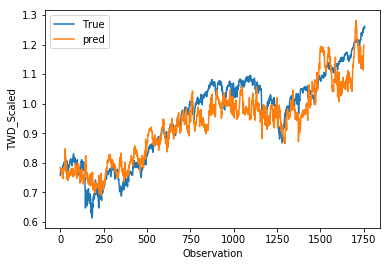

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.840566
The Adjusted R2 score on the Test set is:	0.836


In [79]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

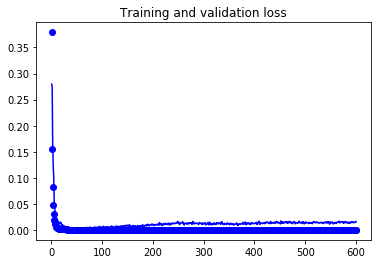

In [80]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [81]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn8.csv', mode='w', header=True, index=False)

# tcn9~11 change filter size

In [82]:
#tcn9

In [83]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=128, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6016        input_11[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_67 (Activation)      (None, 1, 128)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/400
6808/6808 [==============================] - 6s 910us/step - loss: 0.7143 - val_loss: 0.1973
Epoch 2/400
6808/6808 [==============================] - 4s 607us/step - loss: 0.1173 - val_loss: 0.1430
Epoch 3/400
6808/6808 [==============================] - 4s 593us/step - loss: 0.0433 - val_loss: 0.1136
Epoch 4/400
6808/6808 [==============================] - 4s 617us/step - loss: 0.0227 - val_loss: 0.0565
Epoch 5/400
6808/6808 [==============================] - 4s 599us/step - loss: 0.0143 - val_loss: 0.0396
Epoch 6/400
6808/6808 [==============================] - 4s 600us/step - loss: 0.0095 - val_loss: 0.0305
Epoch 7/400
6808/6808 [==============================] - 4s 599us/step - loss: 0.0082 - val_loss: 0.0321
Epoch 8/400
6808/6808 [==============================] - 4s 585us/step - loss: 0.0064 - val_loss: 0.0259
Epoch 9/400
6808/6808 [==============================] - 4s 591us/step - loss: 0.0051 - val_loss: 0.0124
Epoch 10

Epoch 150/400
6808/6808 [==============================] - 4s 571us/step - loss: 2.2580e-04 - val_loss: 0.0019
Epoch 151/400
6808/6808 [==============================] - 4s 572us/step - loss: 2.8394e-04 - val_loss: 0.0026
Epoch 152/400
6808/6808 [==============================] - 4s 574us/step - loss: 2.7918e-04 - val_loss: 0.0036
Epoch 153/400
6808/6808 [==============================] - 4s 570us/step - loss: 2.3495e-04 - val_loss: 0.0051
Epoch 154/400
6808/6808 [==============================] - 4s 573us/step - loss: 2.5428e-04 - val_loss: 0.0054
Epoch 155/400
6808/6808 [==============================] - 4s 569us/step - loss: 2.0260e-04 - val_loss: 0.0075
Epoch 156/400
6808/6808 [==============================] - 4s 570us/step - loss: 2.3071e-04 - val_loss: 0.0090
Epoch 157/400
6808/6808 [==============================] - 4s 571us/step - loss: 2.3903e-04 - val_loss: 0.0074
Epoch 158/400
6808/6808 [==============================] - 4s 571us/step - loss: 2.0048e-04 - val_loss: 0.0046
E

Epoch 224/400
6808/6808 [==============================] - 4s 572us/step - loss: 1.9184e-04 - val_loss: 0.0052
Epoch 225/400
6808/6808 [==============================] - 4s 569us/step - loss: 1.7550e-04 - val_loss: 0.0062
Epoch 226/400
6808/6808 [==============================] - 4s 573us/step - loss: 1.7070e-04 - val_loss: 0.0078
Epoch 227/400
6808/6808 [==============================] - 4s 570us/step - loss: 1.8661e-04 - val_loss: 0.0103
Epoch 228/400
6808/6808 [==============================] - 4s 570us/step - loss: 1.8068e-04 - val_loss: 0.0118
Epoch 229/400
6808/6808 [==============================] - 4s 585us/step - loss: 2.0426e-04 - val_loss: 0.0114
Epoch 230/400
6808/6808 [==============================] - 4s 573us/step - loss: 1.8348e-04 - val_loss: 0.0108
Epoch 231/400
6808/6808 [==============================] - 4s 570us/step - loss: 1.5759e-04 - val_loss: 0.0084
Epoch 232/400
6808/6808 [==============================] - 4s 567us/step - loss: 1.4473e-04 - val_loss: 0.0078
E

Epoch 371/400
6808/6808 [==============================] - 4s 570us/step - loss: 1.0600e-04 - val_loss: 0.0057
Epoch 372/400
6808/6808 [==============================] - 4s 574us/step - loss: 1.0849e-04 - val_loss: 0.0049
Epoch 373/400
6808/6808 [==============================] - 4s 569us/step - loss: 1.1049e-04 - val_loss: 0.0047
Epoch 374/400
6808/6808 [==============================] - 4s 572us/step - loss: 1.1770e-04 - val_loss: 0.0046
Epoch 375/400
6808/6808 [==============================] - 4s 572us/step - loss: 1.1475e-04 - val_loss: 0.0050
Epoch 376/400
6808/6808 [==============================] - 4s 571us/step - loss: 1.2617e-04 - val_loss: 0.0097
Epoch 377/400
6808/6808 [==============================] - 4s 572us/step - loss: 1.3968e-04 - val_loss: 0.0118
Epoch 378/400
6808/6808 [==============================] - 4s 567us/step - loss: 1.4171e-04 - val_loss: 0.0146
Epoch 379/400
6808/6808 [==============================] - 4s 569us/step - loss: 1.4151e-04 - val_loss: 0.0128
E

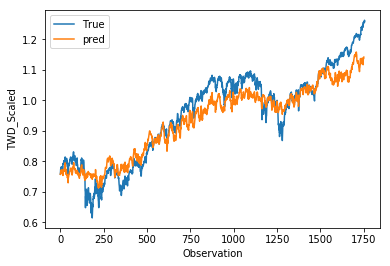

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.888555
The Adjusted R2 score on the Test set is:	0.886


In [84]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

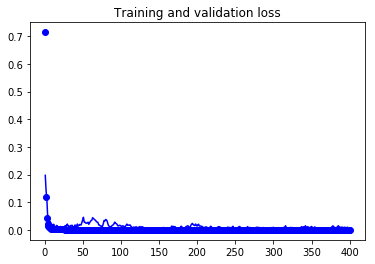

In [85]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [86]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn9.csv', mode='w', header=True, index=False)

In [87]:
#tcn10

In [88]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_12[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_74 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/400
6808/6808 [==============================] - 6s 938us/step - loss: 0.4344 - val_loss: 0.0679
Epoch 2/400
6808/6808 [==============================] - 4s 622us/step - loss: 0.0874 - val_loss: 0.0616
Epoch 3/400
6808/6808 [==============================] - 4s 618us/step - loss: 0.0398 - val_loss: 0.2365
Epoch 4/400
6808/6808 [==============================] - 4s 619us/step - loss: 0.0239 - val_loss: 0.0653
Epoch 5/400
6808/6808 [==============================] - 4s 620us/step - loss: 0.0208 - val_loss: 0.1935
Epoch 6/400
6808/6808 [==============================] - 4s 617us/step - loss: 0.0181 - val_loss: 0.0793
Epoch 7/400
6808/6808 [==============================] - 4s 619us/step - loss: 0.0103 - val_loss: 0.0668
Epoch 8/400
6808/6808 [==============================] - 4s 618us/step - loss: 0.0056 - val_loss: 0.0610
Epoch 9/400
6808/6808 [==============================] - 4s 619us/step - loss: 0.0083 - val_loss: 0.0651
Epoch 10

6808/6808 [==============================] - 4s 638us/step - loss: 2.3150e-04 - val_loss: 0.0040
Epoch 151/400
6808/6808 [==============================] - 4s 626us/step - loss: 2.0436e-04 - val_loss: 0.0050
Epoch 152/400
6808/6808 [==============================] - 4s 624us/step - loss: 2.2017e-04 - val_loss: 0.0030
Epoch 153/400
6808/6808 [==============================] - 4s 624us/step - loss: 1.9247e-04 - val_loss: 0.0046
Epoch 154/400
6808/6808 [==============================] - 4s 643us/step - loss: 1.9539e-04 - val_loss: 0.0039
Epoch 155/400
6808/6808 [==============================] - 4s 627us/step - loss: 1.8401e-04 - val_loss: 0.0043
Epoch 156/400
6808/6808 [==============================] - 4s 622us/step - loss: 1.7289e-04 - val_loss: 0.0053
Epoch 157/400
6808/6808 [==============================] - 4s 638us/step - loss: 2.0025e-04 - val_loss: 0.0044
Epoch 158/400
6808/6808 [==============================] - 4s 647us/step - loss: 1.9268e-04 - val_loss: 0.0049
Epoch 159/400
6

Epoch 297/400
6808/6808 [==============================] - 4s 620us/step - loss: 1.2563e-04 - val_loss: 0.0123
Epoch 298/400
6808/6808 [==============================] - 4s 627us/step - loss: 1.3665e-04 - val_loss: 0.0138
Epoch 299/400
6808/6808 [==============================] - 4s 622us/step - loss: 1.4074e-04 - val_loss: 0.0110
Epoch 300/400
6808/6808 [==============================] - 4s 623us/step - loss: 1.5034e-04 - val_loss: 0.0123
Epoch 301/400
6808/6808 [==============================] - 4s 625us/step - loss: 1.4187e-04 - val_loss: 0.0120
Epoch 302/400
6808/6808 [==============================] - 4s 624us/step - loss: 1.4039e-04 - val_loss: 0.0146
Epoch 303/400
6808/6808 [==============================] - 4s 621us/step - loss: 1.4638e-04 - val_loss: 0.0126
Epoch 304/400
6808/6808 [==============================] - 4s 624us/step - loss: 1.4516e-04 - val_loss: 0.0138
Epoch 305/400
6808/6808 [==============================] - 4s 623us/step - loss: 1.5641e-04 - val_loss: 0.0149
E

Epoch 371/400
6808/6808 [==============================] - 4s 622us/step - loss: 1.1443e-04 - val_loss: 0.0078
Epoch 372/400
6808/6808 [==============================] - 4s 625us/step - loss: 1.2327e-04 - val_loss: 0.0089
Epoch 373/400
6808/6808 [==============================] - 4s 623us/step - loss: 1.3531e-04 - val_loss: 0.0071
Epoch 374/400
6808/6808 [==============================] - 4s 621us/step - loss: 1.2797e-04 - val_loss: 0.0070
Epoch 375/400
6808/6808 [==============================] - 4s 622us/step - loss: 1.2142e-04 - val_loss: 0.0060
Epoch 376/400
6808/6808 [==============================] - 4s 622us/step - loss: 1.2858e-04 - val_loss: 0.0055
Epoch 377/400
6808/6808 [==============================] - 4s 650us/step - loss: 1.2947e-04 - val_loss: 0.0078
Epoch 378/400
6808/6808 [==============================] - 4s 627us/step - loss: 1.2340e-04 - val_loss: 0.0065
Epoch 379/400
6808/6808 [==============================] - 4s 626us/step - loss: 1.3023e-04 - val_loss: 0.0065
E

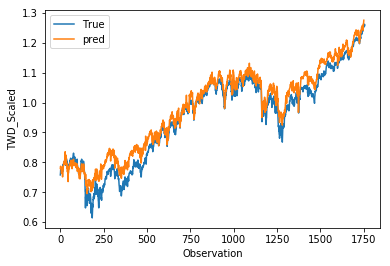

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.933328
The Adjusted R2 score on the Test set is:	0.932


In [89]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

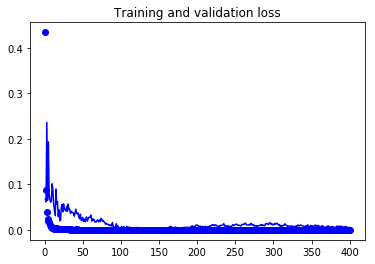

In [90]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [91]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn10.csv', mode='w', header=True, index=False)

In [92]:
#tcn11

In [93]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)

history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       24064       input_13[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_81 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6808 samples, validate on 757 samples
Epoch 1/400
6808/6808 [==============================] - 10s 1ms/step - loss: 0.7455 - val_loss: 0.3894
Epoch 2/400
6808/6808 [==============================] - 7s 1ms/step - loss: 0.1332 - val_loss: 0.0148
Epoch 3/400
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0604 - val_loss: 0.0097
Epoch 4/400
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0395 - val_loss: 0.0200
Epoch 5/400
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0278 - val_loss: 0.0416
Epoch 6/400
6808/6808 [==============================] - 7s 1ms/step - loss: 0.0164 - val_loss: 0.0213
Epoch 7/400
6808/6808 [==============================] - 7s 998us/step - loss: 0.0137 - val_loss: 0.0330
Epoch 8/400
6808/6808 [==============================] - 7s 994us/step - loss: 0.0099 - val_loss: 0.0246
Epoch 9/400
6808/6808 [==============================] - 7s 994us/step - loss: 0.0073 - val_loss: 0.0638
Epoch 10/400
6808/6

6808/6808 [==============================] - 7s 986us/step - loss: 1.7269e-04 - val_loss: 0.0048
Epoch 150/400
6808/6808 [==============================] - 7s 988us/step - loss: 1.6952e-04 - val_loss: 0.0047
Epoch 151/400
6808/6808 [==============================] - 7s 988us/step - loss: 1.6827e-04 - val_loss: 0.0040
Epoch 152/400
6808/6808 [==============================] - 7s 987us/step - loss: 1.7446e-04 - val_loss: 0.0053
Epoch 153/400
6808/6808 [==============================] - 7s 988us/step - loss: 1.7200e-04 - val_loss: 0.0054
Epoch 154/400
6808/6808 [==============================] - 7s 988us/step - loss: 1.7086e-04 - val_loss: 0.0069
Epoch 155/400
6808/6808 [==============================] - 7s 988us/step - loss: 1.6446e-04 - val_loss: 0.0063
Epoch 156/400
6808/6808 [==============================] - 7s 988us/step - loss: 1.7695e-04 - val_loss: 0.0064
Epoch 157/400
6808/6808 [==============================] - 7s 988us/step - loss: 1.7290e-04 - val_loss: 0.0059
Epoch 158/400
6

6808/6808 [==============================] - 7s 985us/step - loss: 1.2031e-04 - val_loss: 0.0023
Epoch 296/400
6808/6808 [==============================] - 7s 986us/step - loss: 1.2437e-04 - val_loss: 0.0034
Epoch 297/400
6808/6808 [==============================] - 7s 987us/step - loss: 1.2250e-04 - val_loss: 0.0031
Epoch 298/400
6808/6808 [==============================] - 7s 986us/step - loss: 1.2726e-04 - val_loss: 0.0022
Epoch 299/400
6808/6808 [==============================] - 7s 986us/step - loss: 1.2382e-04 - val_loss: 0.0028
Epoch 300/400
6808/6808 [==============================] - 7s 986us/step - loss: 1.2927e-04 - val_loss: 0.0029
Epoch 301/400
6808/6808 [==============================] - 7s 986us/step - loss: 1.2297e-04 - val_loss: 0.0020
Epoch 302/400
6808/6808 [==============================] - 7s 986us/step - loss: 1.2246e-04 - val_loss: 0.0036
Epoch 303/400
6808/6808 [==============================] - 7s 986us/step - loss: 1.2568e-04 - val_loss: 0.0028
Epoch 304/400
6

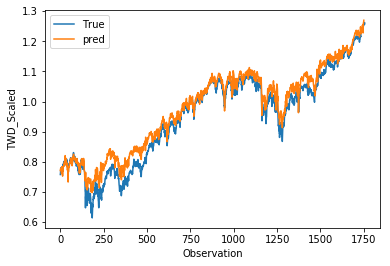

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.940126
The Adjusted R2 score on the Test set is:	0.939


In [94]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[5:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

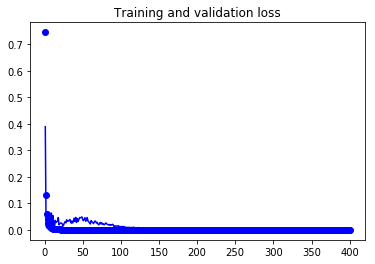

In [95]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [96]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//NYA_de5_mytcn11.csv', mode='w', header=True, index=False)